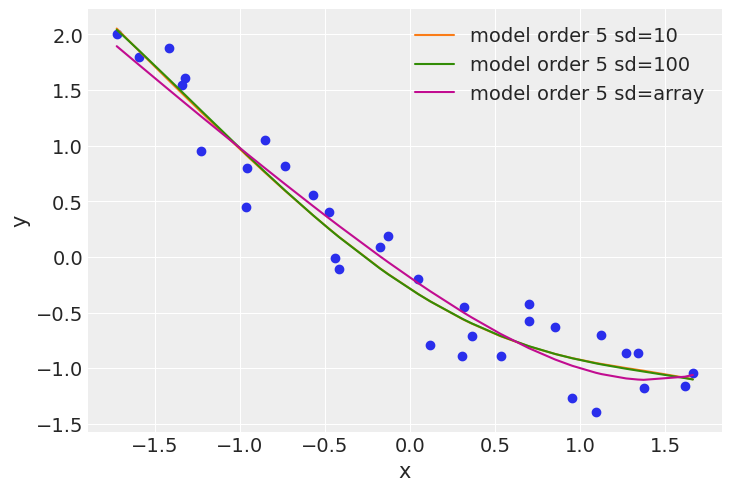

In [4]:
import pymc as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az

az.style.use('arviz-darkgrid')

if __name__ == '__main__':
    dummy_data = np.loadtxt('dummy.csv')
    x_1 = dummy_data[:, 0]
    y_1 = dummy_data[:, 1]
    order = 5
    x_1p = np.vstack([x_1 ** i for i in range(1, order + 1)])
    x_1s = (x_1p - x_1p.mean(axis=1, keepdims=True)) / x_1p.std(axis=1, keepdims=True)
    y_1s = (y_1 - y_1.mean()) / y_1.std()
    plt.scatter(x_1s[0], y_1s)
    plt.xlabel('x')
    plt.ylabel('y')

    with pm.Model() as model_p:
        alfa = pm.Normal('alfa', mu=0, sigma=1)
        beta = pm.Normal('beta', mu=0, sigma=10, shape=order)
        sigma = pm.HalfNormal('eps', 5)
        mu = alfa + pm.math.dot(beta, x_1s)
        y_pred = pm.Normal('y_pred', mu=mu, sigma=sigma, observed=y_1s)
        idata_p = pm.sample(1000, return_inferencedata=True)

    with pm.Model() as model_p100:
        alfa = pm.Normal('alfa', mu=0, sigma=1)
        beta = pm.Normal('beta', mu=0, sigma=100, shape=order)
        sigma = pm.HalfNormal('eps', 5)
        mu = alfa + pm.math.dot(beta, x_1s)
        y_pred100 = pm.Normal('y_pred', mu=mu, sigma=sigma, observed=y_1s)
        idata_p100 = pm.sample(1000, return_inferencedata=True)

    with pm.Model() as model_parray:
        alfa = pm.Normal('alfa', mu=0, sigma=1)
        beta = pm.Normal('beta', mu=0, sigma=np.array([10, 0.1, 0.1, 0.1, 0.1]), shape=order)
        sigma = pm.HalfNormal('eps', 5)
        mu = alfa + pm.math.dot(beta, x_1s)
        y_predarray = pm.Normal('y_pred', mu=mu, sigma=sigma, observed=y_1s)
        idata_parray = pm.sample(1000, return_inferencedata=True)

    alfa_p_post = idata_p.posterior['alfa'].mean(("chain", "draw")).values
    beta_p_post = idata_p.posterior['beta'].mean(("chain", "draw")).values
    y_p_post = alfa_p_post + np.dot(beta_p_post, x_1s)
    idx = np.argsort(x_1s[0])
    plt.plot(x_1s[0][idx], y_p_post[idx], 'C1', label=f'model order {order} sd=10')

    alfa_p_post100 = idata_p100.posterior['alfa'].mean(("chain", "draw")).values
    beta_p_post100 = idata_p100.posterior['beta'].mean(("chain", "draw")).values
    y_p_post100 = alfa_p_post100 + np.dot(beta_p_post100, x_1s)
    plt.plot(x_1s[0][idx], y_p_post100[idx], 'C2', label=f'model order {order} sd=100')

    alfa_p_postarray = idata_parray.posterior['alfa'].mean(("chain", "draw")).values
    beta_p_postarray = idata_parray.posterior['beta'].mean(("chain", "draw")).values
    y_p_postarray = alfa_p_postarray + np.dot(beta_p_postarray, x_1s)
    plt.plot(x_1s[0][idx], y_p_postarray[idx], 'C3', label=f'model order {order} sd=array')

    plt.scatter(x_1s[0], y_1s, c='C0', marker='.')
    plt.legend()
